 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [29]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [30]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv)

In [31]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [32]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [33]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv)

In [34]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [35]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [36]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv)
sp500_df.set_index('Date')
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [37]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [38]:
# Fix Data Types
#YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df.dtypes

Date      object
Close    float64
dtype: object

In [39]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns = sp500_df['Close'].pct_change()
daily_returns.head()

0         NaN
1   -0.008764
2   -0.001011
3   -0.001577
4    0.002279
Name: Close, dtype: float64

In [40]:
# Drop nulls
# YOUR CODE HERE
daily_returns.dropna(inplace=True)
daily_returns.head()

1   -0.008764
2   -0.001011
3   -0.001577
4    0.002279
5   -0.000509
Name: Close, dtype: float64

In [41]:
# Rename Column
# YOUR CODE HERE
columns = ["Date", "S&P 500"]
daily_returns.columns = columns
daily_returns.head()

1   -0.008764
2   -0.001011
3   -0.001577
4    0.002279
5   -0.000509
Name: Close, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [42]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
returns_master = pd.concat([whale_df, algo_df, daily_returns], axis="columns", join="inner")
returns_master = returns_master.drop(columns=["Date"])
returns_master.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
6,-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630
7,0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566
8,0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038
9,-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466
10,0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

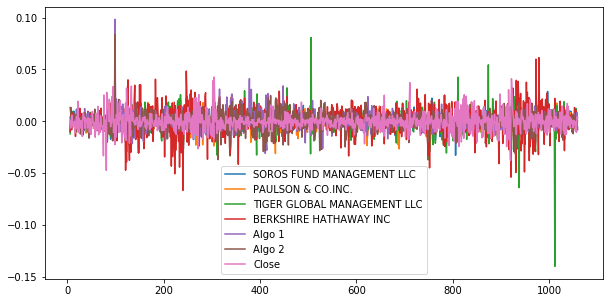

In [43]:
# Plot daily returns
# YOUR CODE HERE
returns_master.plot(figsize=(10,5))

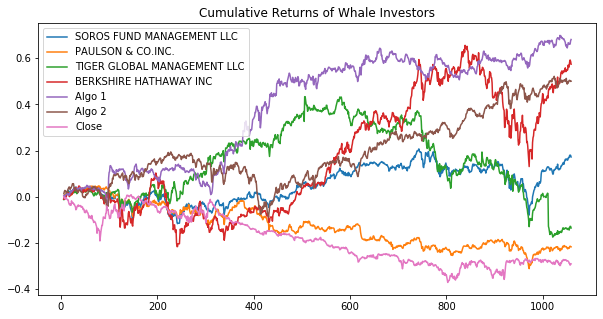

In [44]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + returns_master).cumprod() - 1
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Whale Investors")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

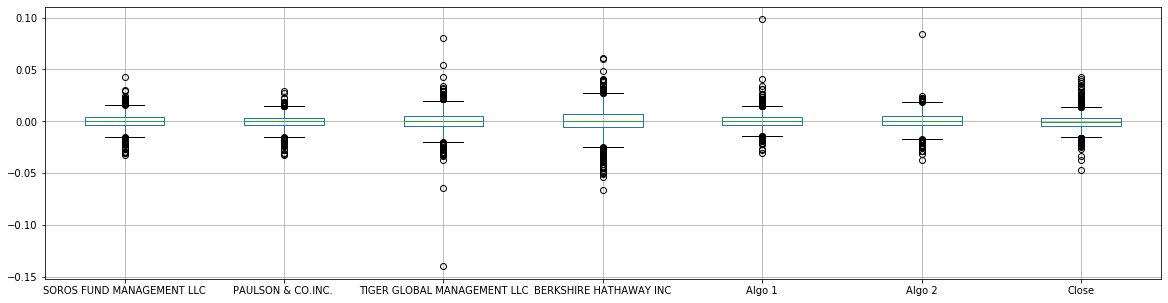

In [45]:
# Box plot to visually show risk
# YOUR CODE HERE
returns_master.boxplot(figsize=(20,5))


In [46]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
returns_master_std = returns_master.std()

In [47]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [48]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = returns_master_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

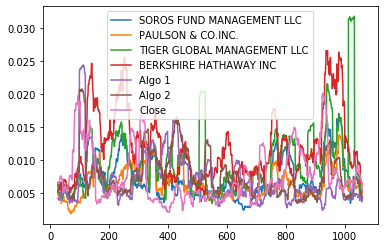

In [49]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
returns_master.rolling(window=21).std().plot()

In [50]:
# Construct a correlation table
# YOUR CODE HERE
correlation_tbl = returns_master.corr()
correlation_tbl

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.700191,0.561548,0.754025,-0.013205,-0.003091,-0.036216
PAULSON & CO.INC.,0.700191,1.000000,0.435163,0.545549,-0.030506,-0.026532,-0.020471
TIGER GLOBAL MANAGEMENT LLC,0.561548,0.435163,1.000000,0.424908,-0.014538,-0.039470,0.032741
BERKSHIRE HATHAWAY INC,0.754025,0.545549,0.424908,1.000000,-0.005687,-0.025006,-0.002710
Algo 1,-0.013205,-0.030506,-0.014538,-0.005687,1.000000,0.327996,-0.020353
Algo 2,-0.003091,-0.026532,-0.039470,-0.025006,0.327996,1.000000,-0.028751
Close,-0.036216,-0.020471,0.032741,-0.002710,-0.020353,-0.028751,1.000000


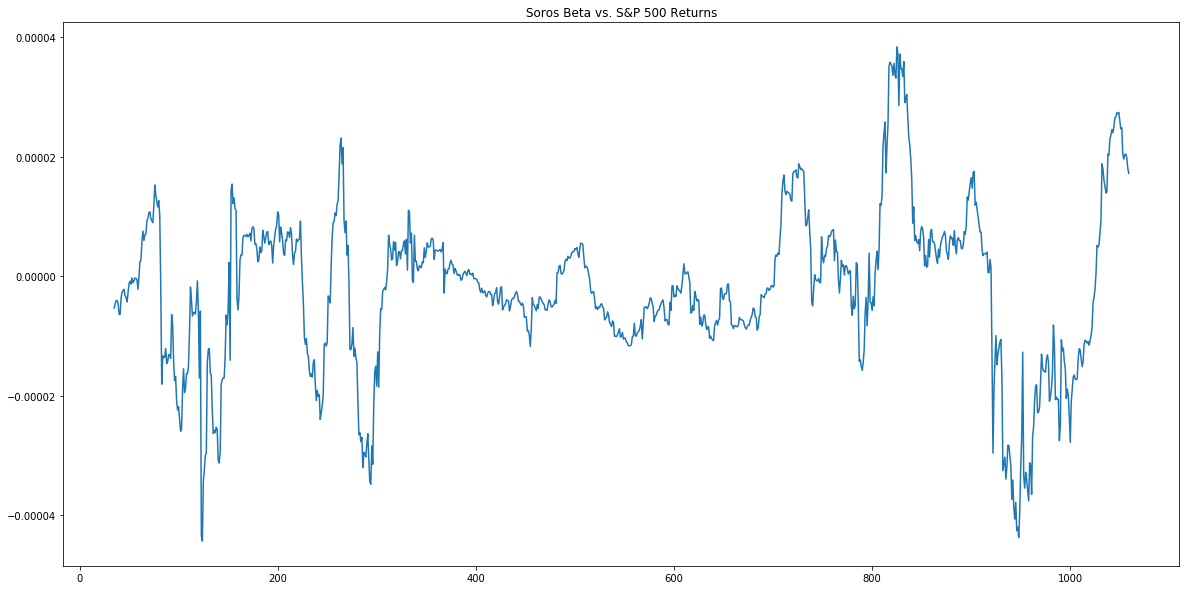

In [51]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

rolling_covariance = returns_master['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(returns_master['Close'])
rolling_covariance.plot(figsize=(20, 10), title='Soros Beta vs. S&P 500 Returns')

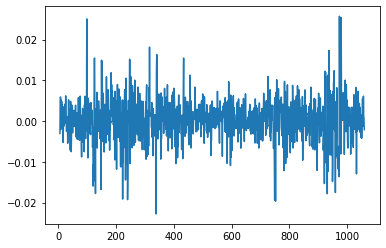

In [52]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
weights = [0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1]

portfolio_returns = returns_master.dot(weights)
portfolio_returns.plot()

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [53]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (returns_master.mean() * 252) / (annualized_std)
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.367157
PAULSON & CO.INC.             -0.470044
TIGER GLOBAL MANAGEMENT LLC   -0.113992
BERKSHIRE HATHAWAY INC         0.633782
Algo 1                         1.070733
Algo 2                         0.804573
Close                         -0.535728
dtype: float64

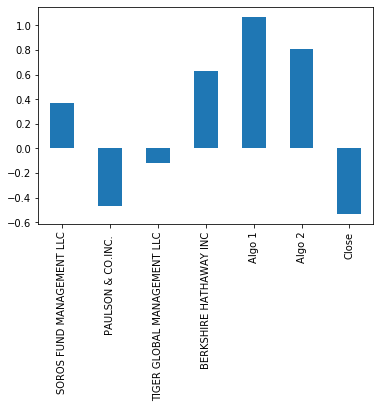

In [54]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar()

#based on my analysis and understanding our algo stratages out perform both the market and whales.

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [55]:
# Read the first stock
# YOUR CODE HERE
goog_hist_csv = Path("Resources/goog_historical.csv")
goog_hist_csv = pd.read_csv(goog_hist_csv)
goog_hist_csv

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
...,...,...,...
245,GOOG,5/17/2018,1078.59
246,GOOG,5/16/2018,1081.77
247,GOOG,5/15/2018,1079.23
248,GOOG,5/14/2018,1100.20


In [56]:
# Read the second stock
# YOUR CODE HERE
aapl_hist_csv = Path("Resources/aapl_historical.csv")
aapl_hist_csv = pd.read_csv(aapl_hist_csv)
aapl_hist_csv

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75
...,...,...,...
245,AAPL,5/17/2018,186.99
246,AAPL,5/16/2018,188.18
247,AAPL,5/15/2018,186.44
248,AAPL,5/14/2018,188.15


In [57]:
# Read the third stock
# YOUR CODE HERE
cost_hist_csv = Path("Resources/cost_historical.csv")
cost_hist_csv = pd.read_csv(cost_hist_csv)
cost_hist_csv

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62
...,...,...,...
245,COST,5/17/2018,199.60
246,COST,5/16/2018,198.71
247,COST,5/15/2018,195.48
248,COST,5/14/2018,195.88


In [88]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_master = pd.concat([goog_hist_csv, aapl_hist_csv, cost_hist_csv], axis="rows", join="inner")
custom_master = custom_master.T.drop_duplicates().T
custom_master.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.1
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.4


In [89]:
# Pivot so that each column of prices represents a unique symbol
#custom_master.dtypes
custom_master['NOCP'] = custom_master['NOCP'].astype(float)
custom_master.pivot_table(columns='Symbol', values='NOCP', index= 'Trade DATE')

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/10/2019,153.80,210.64,1070.33
1/11/2019,152.29,210.51,1057.19
1/14/2019,150.00,209.00,1044.69
1/15/2019,153.07,211.03,1077.15
1/16/2019,154.94,210.18,1080.97
...,...,...,...
9/28/2018,225.74,234.88,1193.47
9/4/2018,228.36,234.68,1197.00
9/5/2018,226.87,235.61,1186.48


In [95]:
# Drop Nulls
# YOUR CODE HERE
custom_master.dropna(inplace=True)
custom_master['NOCP'] = custom_master['NOCP'].astype(float)
custom_master.dtypes

Symbol         object
Trade DATE     object
NOCP          float64
dtype: object

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [96]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
custom_master_returns = custom_master.dot(weights)
custom_master_returns.plot()

TypeError: can't multiply sequence by non-int of type 'float'

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
#use pd.concat to join all data frames

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
#use .dropna

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE
#calculated using std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

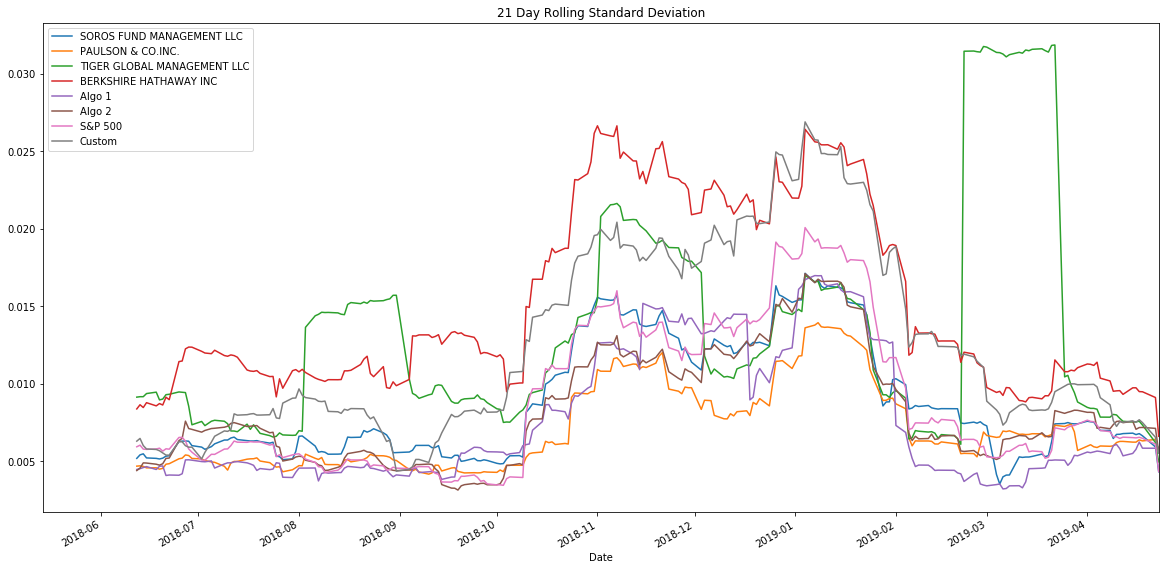

In [39]:
# Rolling
# YOUR CODE HERE

In [40]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

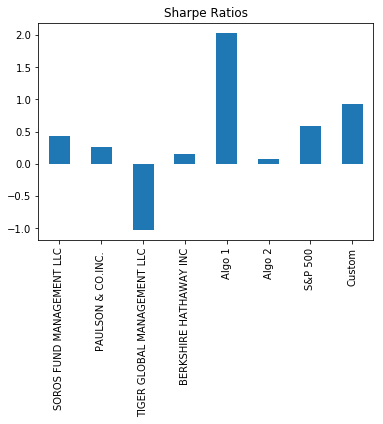

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [42]:
# Create a correlation analysis
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


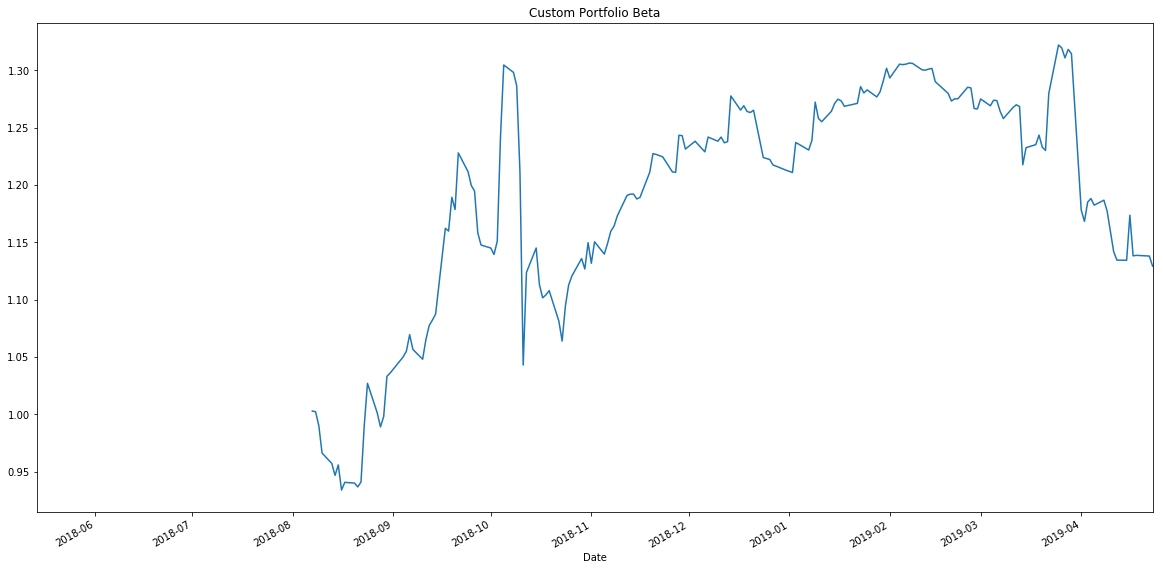

In [43]:
# Beta
# YOUR CODE HERE